# Exploratory Analysis For 911 Call Data

Analyzing 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

____
** Import numpy and pandas **

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [6]:
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [7]:
df=pd.read_csv("911.csv")

** Check the info() of the df **

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [9]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


###### Head of the above Data Frame

In [10]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** Top 5 zipcodes of 911 calls **

In [11]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** Top 5 townships (twp) of 911 calls **

In [12]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Number of Unique title codes **

In [13]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic.  

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [14]:
df['Reason']=df['title'].apply(lambda title : title.split(':')[0])

**Most common Reason for a 911 call based off of this new column **

In [15]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [16]:
import seaborn as sns

**Countplot of 911 calls by Reason. **

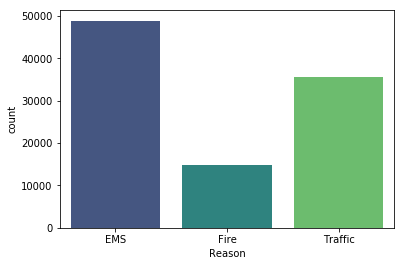

In [17]:
sns.countplot(x='Reason',data=df,palette='viridis')

___
**Focusing on time information. Finding the data type of the objects in the timeStamp column **

In [18]:
type(df['timeStamp'].iloc[0])

str

**From the above,these timestamps are still strings. We need to convert the entire column from strings to DateTime objects. **

In [19]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

**Now, that the timestamp column are converted to DateTime objects,Creating the 3 new columns called Hour, Month, and Day of Week.**

In [20]:
df['Hour']=df['timeStamp'].apply(lambda time:time.hour)
df['month']=df['timeStamp'].apply(lambda time:time.month)
df['day of week']=df['timeStamp'].apply(lambda time:time.dayofweek)

** Notice how the Day of Week is an integer 0-6.Now map the actual string names to the day of the week: **

In [21]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}

In [22]:
df['day of week']=df['day of week'].map(dmap)

**Creating a countplot of the Day of Week column with the hue based off of the Reason column. **

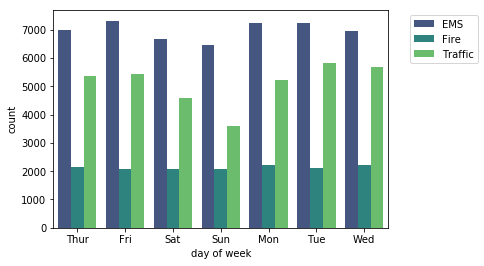

In [23]:
sns.countplot(x='day of week',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1))#Relocating the Legend from the original Position

**Now doing the same for Month:**

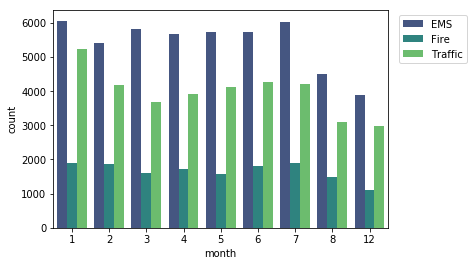

In [24]:
sns.countplot(x='month',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.25,1.))

**From the above, we noticed that some Months was missing,We can fill this missing information by plotting the information in another way by plotting simple line plot**

** Now creating a gropuby object called byMonth, where we can group the DataFrame by the month column and we can use the count() method for aggregation. **

In [25]:
bymonth=df.groupby('month').count()
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,day of week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now creating a simple plot of the dataframe indicating the count of calls per month. **

In [26]:
sns.set_style('whitegrid')
%matplotlib inline

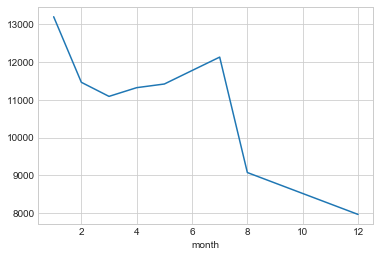

In [27]:
bymonth['twp'].plot()

** From the above we can create a linear fit on the number of calls per month. **

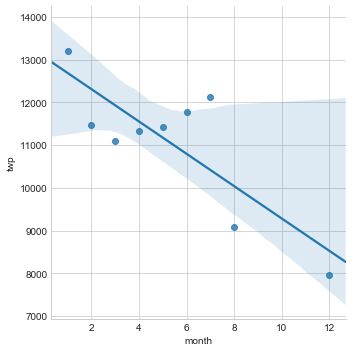

In [28]:
sns.lmplot(x='month',y='twp',data=bymonth.reset_index())

**Creating a new column called 'date' that contains the date from the timeStamp column.** 

In [29]:
df['date']=df['timeStamp'].apply(lambda t:t.date())
df['date'].head()


0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: date, dtype: object

** Now creating a groupby to this Date column with the count() aggregating and creating a plot of counts of 911 calls.**

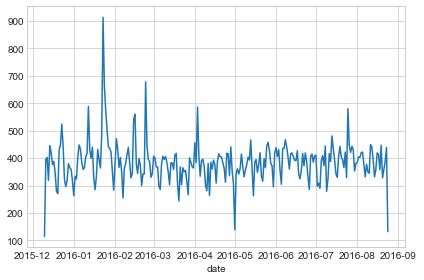

In [30]:
df.groupby('date').count()['twp'].plot()
plt.tight_layout()

** Now recreatin this plot with 3 separate plots with each plot representing a Reason for the 911 call**



** Following plot representing 911 Calls based on Traffic **

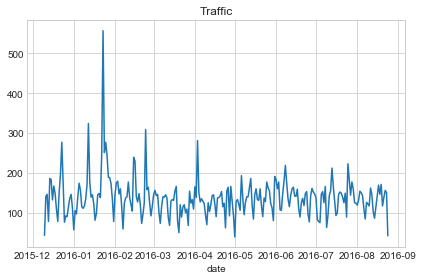

In [31]:
df[df['Reason']=='Traffic'].groupby('date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

#### **Following plot representing 911 calls based on Fire**

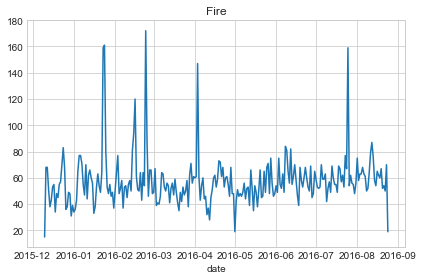

In [32]:
df[df['Reason']=='Fire'].groupby('date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

#### **Following plot reprsenting 911 Calls based on EMS**

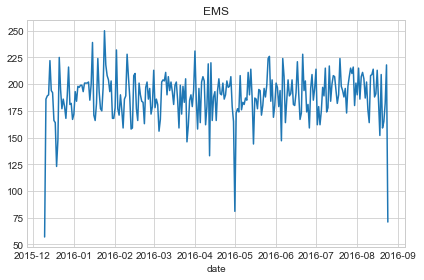

In [33]:
df[df['Reason']=='EMS'].groupby('date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()


**Creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.**

In [34]:
dayhour=df.groupby(by=['day of week','Hour']).count()['Reason'].unstack()
dayhour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thur,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


**Creating a HeatMap using the above new DataFrame. **

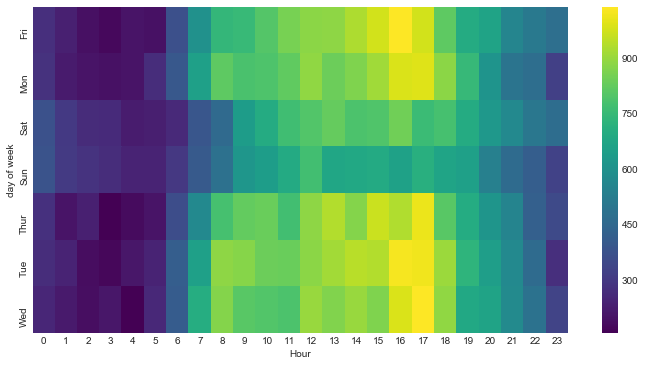

In [35]:
plt.figure(figsize=(12,6))
sns.heatmap(dayhour,cmap='viridis')

**Creating a clustermap using this DataFrame. **

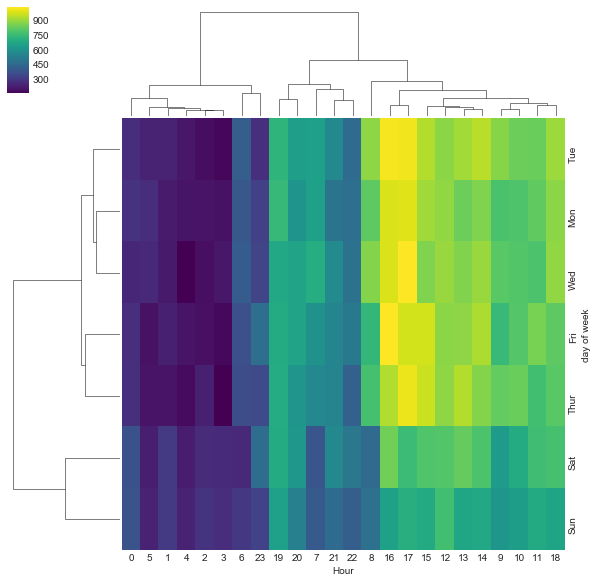

In [36]:
sns.clustermap(dayhour,cmap='viridis')

**Repeating the same plots and operations, for a DataFrame that shows the Month as the column. **

In [37]:
dayofmonth=df.groupby(['day of week','month']).count()['Reason'].unstack()

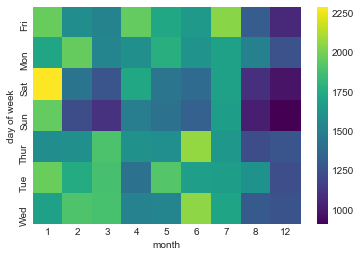

In [38]:
sns.heatmap(dayofmonth,cmap='viridis')

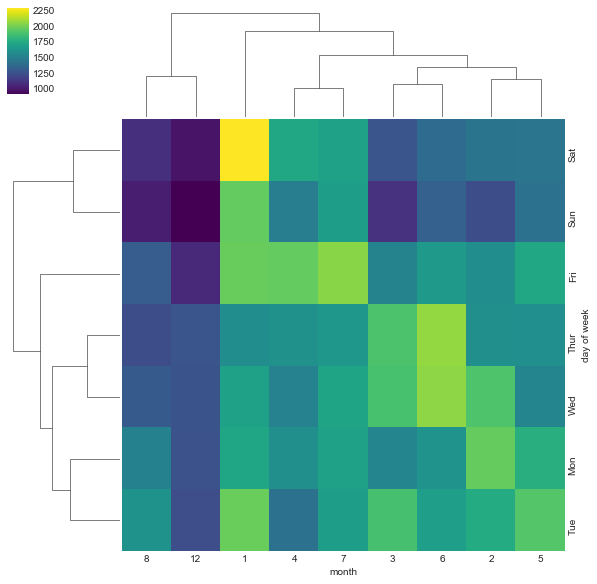

In [39]:
sns.clustermap(dayofmonth,cmap='viridis')